<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [2]:
# import your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Load the health insurance dataset and check the first five observations

In [3]:
# import your code here
data=pd.read_csv('health_insurance.csv')
data

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
age             1300 non-null int64
gender          1300 non-null object
bmi             1300 non-null float64
bp              1300 non-null int64
children        1300 non-null int64
region          1300 non-null object
smoker          1300 non-null object
medical_cost    1300 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [5]:
data.describe()

,age,bmi,bp,children,medical_cost
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,42.280769,31.581396,147.774615,1.104615,13243.214691
std,14.024847,6.356487,11.221987,1.208697,12060.371167
min,19.000000,15.290000,120.000000,0.000000,1121.873900
25%,29.750000,27.207500,140.000000,0.000000,4760.155950
50%,42.000000,31.645000,150.000000,1.000000,9388.753650
75%,54.000000,35.488750,156.000000,2.000000,16579.959052
max,69.000000,57.130000,178.000000,5.000000,63770.428010


In [4]:
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(exclude=np.number)

### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

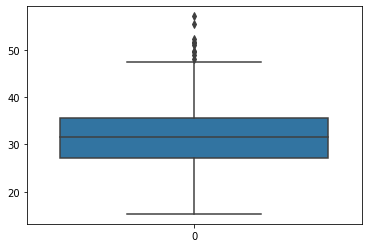

In [22]:
sns.boxplot(data=data['bmi'])
plt.show()

##### INFERENCE:
    EXTREME OBESRVATIONS ARE THERE IN BMI ABOVE BMI OF 48

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# import your code here
data['age'].skew()

0.04359793424360781

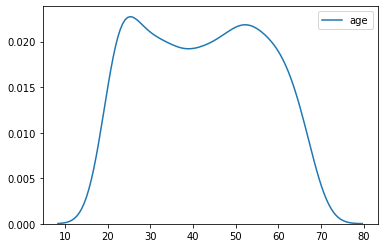

In [36]:
#kde plot
sns.kdeplot(data['age'])
plt.show()

##### INFERENCE:-
    AGE IS RIGHT SKEWED

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
data[data['medical_cost']<25000]

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1294,54,M,42.700,156,3,northeast,non-smoker,11411.68500
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350


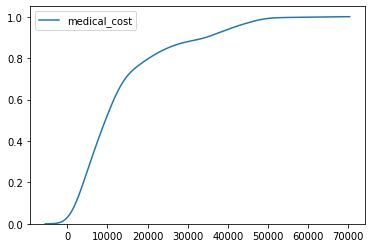

In [35]:
sns.kdeplot(data['medical_cost'],cumulative=True)
plt.show()

##### INFERENCE:-
      The probability that the individuals have charged less than 25k for medical treatment is Keep on Increasing Gradually

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

31.581396153846132


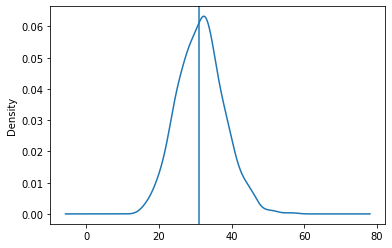

In [44]:
# import your code here
data['bmi'].plot(kind='kde')
print(data['bmi'].mean())#vxline
plt.axvline(31)#the line for mean on the distribution plot
plt.show()

31.645


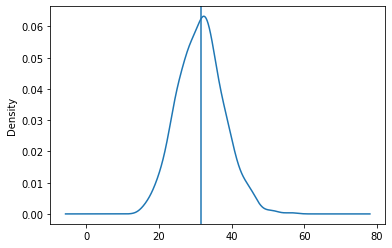

In [94]:
data['bmi'].plot(kind='kde')
print(data['bmi'].median())#vxline
plt.axvline(31.645)#the line for median on the distribution plot
plt.show()

In [40]:
data['bmi'].skew()#SKEWNESS

0.2496769760401315

##### INFERENCE:-
    BMI IS RIGHT SKEWED

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

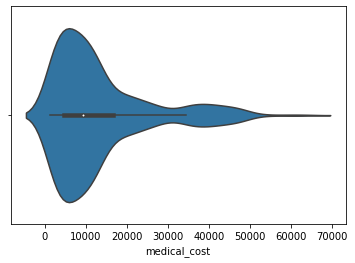

In [43]:
# import your code here
sns.violinplot(data['medical_cost'])
plt.show()

##### INFERENCE:-
    MORE MEDICAL COST IS BETWEEN RS.9000 TO RS.10000 AND THEN COMPARITIVELY  MORE MEDICAL COST BETWEEN RS40000 TO 50000

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# import your code here
data[(data['age']<30) & (data['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


##### INFERENCE:-
    There are 3 individual with age less than 30 and medical cost greater than 40k.All have BMI>25(obese)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

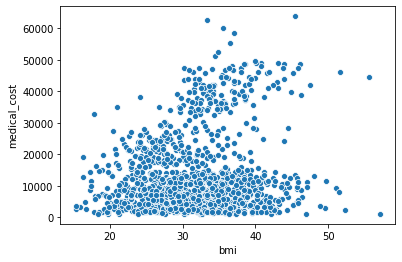

In [61]:
# import your code here
sns.scatterplot(data['bmi'],data['medical_cost'])
plt.show()

In [69]:
data[(data['medical_cost']<5000) & (data['bmi']>50)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
809,28,F,52.38,156,1,northeast,non-smoker,2438.0552
1279,22,F,57.13,150,0,northwest,non-smoker,1163.4627


##### OBSERVATION:-
    YES the scatter plot of BMI and medical cost reveal potential outliers-THERE Are 2 potential outliers BOTH ARE NON-SMOKING FEMALE BUT HAVE EMI>50 BUT MEDICAL COST<5000 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import your code here
#co_eff_variance
#groupby('gender').mean()

In [90]:
data.groupby('gender')['bmi'].mean()

gender
F    31.825989
M    31.331477
Name: bmi, dtype: float64

##### INFERENCE:-
    FEMALES HAVE LESS BMI THAN THAN MALES

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
pd.crosstab(data['region'],data['gender'])/data['gender'].value_counts()*100


gender,F,M
region,,
northeast,26.484018,21.928460
northwest,22.678843,25.816485
southeast,27.092846,27.682737
southwest,23.744292,24.572317


##### INFERENCE:-
    southeast region has the highest number of males

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import your code here
#pairplot/correlation and heatmap


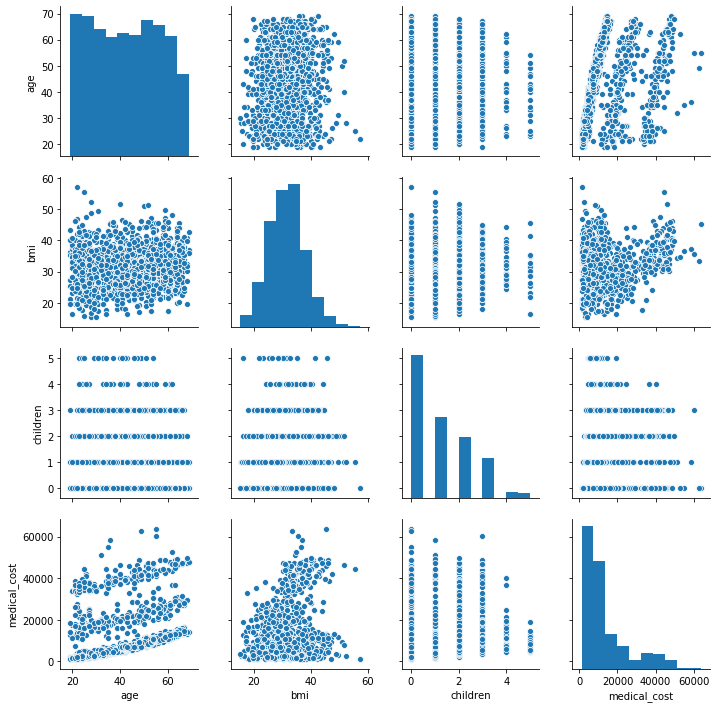

In [79]:
data1=data[['age','bmi','children','medical_cost']]
sns.pairplot(data1)
plt.show()

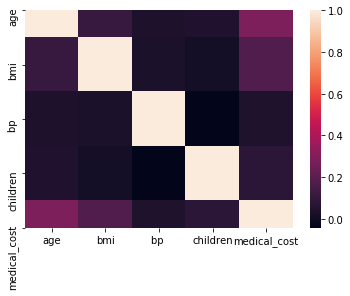

In [82]:
sns.heatmap(data_num.corr())
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

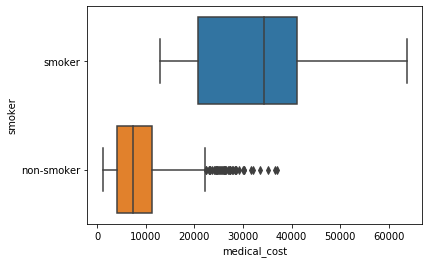

In [12]:
#numeric vs categoric-boxplot and violin plot or group by
sns.boxplot(data['medical_cost'],data['smoker'])
plt.show()

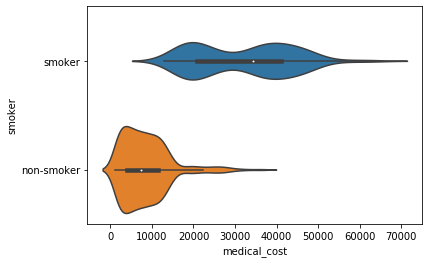

In [13]:
sns.violinplot(data['medical_cost'],data['smoker'])
plt.show()

##### OBSERVATION:-
    SMOKERS HAVE MORE MEDICAL COST COMPARED TO NON-SMOKERS

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

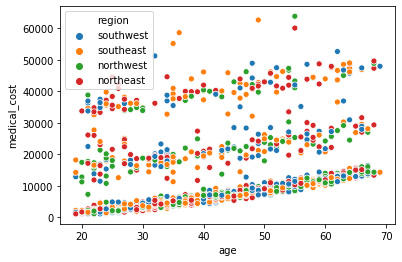

In [89]:
# import your code here
#3variables-2 numeric vs one category-scatter plot with hue
sns.scatterplot(data=data,x='age',y='medical_cost',hue='region')
plt.show()

##### INFERENCE:-
    MEDICAL COST GRADUALLY INCREASING WRT INCREASE IN AGE,IN ALL REGION UNDER RS.10000 
    MEDICAL COST FLUCTUATES IN RS.20000-60000 FOR ALL REGION WRT TO INCREASE IN AGE

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

In [4]:
data1=data.copy()


In [5]:
data

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [6]:
data1

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [12]:
data2=pd.get_dummies(data1,columns=['gender','region','smoker']).head()

In [14]:
data2.shape

(5, 14)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# import your code here
pd.get_dummies(data1,columns=['region']).head()

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,M,31.900,157,0,smoker,16884.92400,0,0,0,1
1,20,F,36.770,160,1,non-smoker,1725.55230,0,0,1,0
2,33,F,35.000,145,3,non-smoker,4449.46200,0,0,1,0
3,37,F,23.705,153,0,non-smoker,21984.47061,0,1,0,0
4,36,F,27.880,156,0,non-smoker,3866.85520,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# import your code here
smoker_label=data1['smoker'].nunique()
smoker_label

2

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['smoker_le']=le.fit_transform(data1['smoker'])

In [9]:
data1['smoker_le']

0       1
1       0
2       0
3       0
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    1
Name: smoker_le, Length: 1300, dtype: int32

In [11]:
data1[['smoker_le','smoker']]

,smoker_le,smoker
0,1,smoker
1,0,non-smoker
2,0,non-smoker
3,0,non-smoker
4,0,non-smoker
...,...,...
1295,0,non-smoker
1296,0,non-smoker
1297,0,non-smoker
1298,0,non-smoker


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# import your code here
tab2=data1['gender'].value_counts()

In [26]:
tab2

F    657
M    643
Name: gender, dtype: int64

In [27]:
data1['gender'].map(tab2)

0       643
1       657
2       657
3       657
4       657
       ... 
1295    657
1296    643
1297    643
1298    643
1299    643
Name: gender, Length: 1300, dtype: int64

In [30]:
data1['gender']=data1['gender'].map(tab2)

In [31]:
data1

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,643,31.900,157,0,southwest,smoker,16884.92400
1,20,657,36.770,160,1,southeast,non-smoker,1725.55230
2,33,657,35.000,145,3,southeast,non-smoker,4449.46200
3,37,657,23.705,153,0,northwest,non-smoker,21984.47061
4,36,657,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,657,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,643,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,643,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,643,24.800,150,0,northwest,non-smoker,2007.94500


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# import your code here
data1['smoker'].shape

(1300,)

In [38]:
data1['smoker'].values.reshape(1,-1).shape

(1, 1300)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['smoker_le']=le.fit_transform(data1['smoker'])
data1['smoker_le']

0       1
1       0
2       0
3       0
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    1
Name: smoker_le, Length: 1300, dtype: int32

In [50]:
data1[['smoker','smoker_le']]

,smoker,smoker_le
0,smoker,1
1,non-smoker,0
2,non-smoker,0
3,non-smoker,0
4,non-smoker,0
...,...,...
1295,non-smoker,0
1296,non-smoker,0
1297,non-smoker,0
1298,non-smoker,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
# import your code here
#standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()#SCALED VERSION OF DATA IS STORED IN THE MEMORY/HARDWARE
data_num_sc=sc.fit_transform(data_num)#FIT transform STAGE-AS WHOLE APPLY THE DATA#SCALED VERSION OF DATA IS STORED IN DATA_NUM_SC
#converting scaleddata numpy to dataframe
data_num_sc=pd.DataFrame(data_num_sc)
data_num_sc.columns=data_num.columns

In [103]:
data_num_sc

,age,bmi,bp,children,medical_cost
0,-1.375287,0.050142,0.822398,-0.914241,0.302073
1,-1.589275,0.816583,1.089833,-0.086586,-0.955368
2,-0.661992,0.538020,-0.247343,1.568726,-0.729425
3,-0.376674,-1.239588,0.465817,-0.914241,0.725071
4,-0.448004,-0.582526,0.733252,-0.914241,-0.777751
...,...,...,...,...,...
1295,0.835926,-0.096222,-0.425633,1.568726,-0.219204
1296,-1.446616,0.525430,0.733252,-0.914241,-0.915518
1297,-1.517946,0.514413,-0.247343,-0.914241,-0.963308
1298,-1.446616,-1.067257,0.198382,-0.914241,-0.931944


In [108]:
data_num.head(2)

,age,bmi,bp,children,medical_cost
0,23,31.90,157,0,16884.9240
1,20,36.77,160,1,1725.5523


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import your code here
#min max

In [105]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()#SCALED VERSION OF DATA IS STORED IN THE MEMORY/HARDWARE
data_num_mm=mm.fit_transform(data_num)#FIT transform STAGE-AS WHOLE APPLY THE DATA#SCALED VERSION OF DATA IS STORED IN DATA_NUM_SC
#converting scaleddata numpy to dataframe
data_num_mm=pd.DataFrame(data_num_mm)
data_num_mm.columns=data_num.columns
data_num_mm.head(2)

,age,bmi,bp,children,medical_cost
0,0.08,0.396989,0.637931,0.0,0.251611
1,0.02,0.513384,0.689655,0.2,0.009636


In [107]:
data_num.head(2)

,age,bmi,bp,children,medical_cost
0,23,31.90,157,0,16884.9240
1,20,36.77,160,1,1725.5523


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import your code here
#boxcox
#power transform

In [109]:
data_num['medical_cost'].skew()

1.5341854555059413

In [5]:
#POWER TRANSFORM->NON-LINEAR METHOD
np.power(data_num['medical_cost'],0.4).skew()

0.6349700175139518

In [7]:
from scipy import stats
tr,lam=stats.boxcox(data['medical_cost'])
lam

0.044952630049998006

In [8]:
pd.DataFrame(tr).skew()

0   -0.008662
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [10]:
data['medical_cost']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1295    10600.54830
1296     2205.98080
1297     1629.83350
1298     2007.94500
1299    29141.36030
Name: medical_cost, Length: 1300, dtype: float64

In [9]:
log_medical_cost=np.log(data['medical_cost'])
log_medical_cost

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1295     9.268661
1296     7.698927
1297     7.396233
1298     7.604867
1299    10.279914
Name: medical_cost, Length: 1300, dtype: float64

In [11]:
np.exp(log_medical_cost)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1295    10600.54830
1296     2205.98080
1297     1629.83350
1298     2007.94500
1299    29141.36030
Name: medical_cost, Length: 1300, dtype: float64

In [91]:
powr=np.power(data['medical_cost'],0.3)
powr

0       18.545978
1        9.355746
2       12.430605
3       20.074041
4       11.918110
          ...    
1295    16.128668
1296    10.071184
1297     9.196932
1298     9.790966
1299    21.845045
Name: medical_cost, Length: 1300, dtype: float64

In [92]:
np.power(powr,1/0.3)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1295    10600.54830
1296     2205.98080
1297     1629.83350
1298     2007.94500
1299    29141.36030
Name: medical_cost, Length: 1300, dtype: float64